# Regressione lineare classica

Per regressione lineare classica si intende la regressione lineare nei parametri.

Ad esempio

Il modello: $$y=\beta_0 + \beta_1x + \beta_2x^2 + \epsilon$$ può essere riscritto linearmente come il modello: $$y=\beta_0 + \beta_1x + \beta_2z + \epsilon$$ dove $z = x^2$, quando è possibile fare questa trasformazione il modello si dice **lineare nei parametri**.

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_stata("../Data/rent99.dta")

## Regressione lineare univariata

Il modello lineare più semplice è quello con un parametro, cioè $y=\beta_0 + \beta_1x+ \epsilon$.

Per stimarlo utilizziamo i minimi quadrati ordinari (OLS) implementato nella funzione `OLS` della libreria `statsmodels`.

Per stimare il modello dobbiamo prima fornire la variabile indipendente e dipendente.

ATTENZIONE:

Per la corretta specificazione del modello, la matrice di **costruzione** $X$ deve avere la prima colonna (che corrisponde a $\beta_0$) di tutti 1.

In questo modo il modello sarà in grado di stimare correttamente l'intercetta.

Per aggiungere la costante usiamo il metodo `add_constant` nel seguente modo:

```python
X = df["nome_colonna"]
X = sm.add_constant(X)
```

In [2]:
y = df["rent"]
X = df["area"]
X = sm.add_constant(X)

Una volta che il data frame è stato diviso, possiamo stimare il modello, per farlo creiamo prima l'oggetto di tipo OLS con `sm.OLS(y, X)`e successivamente chiamiamo il metodo `fit()` per fare la computazione effettiva.

Possiamo poi stampare il risultato ottenuto con il metodo `summary()`.

In [3]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1599.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          6.13e-282
Time:                        18:53:01   Log-Likelihood:                -19990.
No. Observations:                3082   AIC:                         3.998e+04
Df Residuals:                    3080   BIC:                         4.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.5922      8.613     15.626      0.0

Per il plotting dobbiamo separatamente plottare i dati e la retta di regressione che abbiamo calcolato in precedenza.

I valori della retta si trovano nell'attributo `fittedvalues`

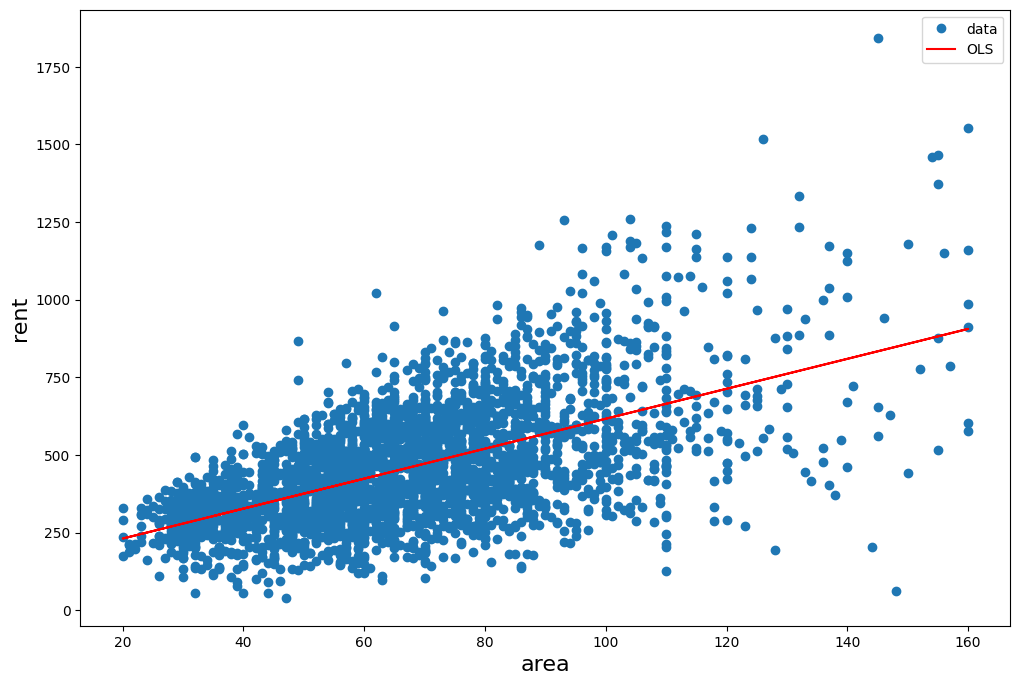

In [4]:
plt.figure(figsize=(12, 8))
plt.xlabel("area",size=16)
plt.ylabel("rent",size=16)
#Plot the data
plt.plot(X["area"], y, "o", label="data")
#Plot the regression line
plt.plot(X["area"], results.fittedvalues, "r-", label="OLS")

plt.legend(loc="best")
plt.show()

## Regressione lineare multivariata

Il procedimento è identico a quello della regressione univariata, cambia solo il modo di fornire le variabili indipendenti.

Supponendo che la variabile indipendente sia
```python 
y = df["nome_colonna"]
```

Ci possono essere due casi:

- La matrice di costruzione comprende tutto il dataset tranne la colonna della variabile dipendente
  
  ```python
  X = df.loc[:,df.columns != y.name]
  ```
- La matrice di costruzione comprende tutte le colonne tranne alcune:
  
  ```python
  X = df.loc[:, ~df.columns.isin(['Variabile_dipendente', 'colonna_1', ... ])]
  ```
> In entrambi i casi si escludono le colonne con il metodo `loc` di `pandas`

In [5]:
y = df["rent"]
X = df.loc[:,df.columns != y.name]
X = df.loc[:, ~df.columns.isin(['rent', 'area'])]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     225.3
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          7.74e-271
Time:                        18:53:01   Log-Likelihood:                -19996.
No. Observations:                3082   AIC:                         4.001e+04
Df Residuals:                    3074   BIC:                         4.006e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1641.6316    295.909      5.548      0.0

## Trasformazioni
Non sempre il modello lineare semplice si adatta bene ai dati, è possibile effettuare delle trasformazioni sulle variabili per migliorarne l'adattamento mantenendone la linearità. 

Le principali sono:

- inversa
- linear-log
- log-linear
- log-log
  
La sintassi per aggiungere una colonna al dataframe è la seguente 
```python
df["nuova_colonna"] = trasformazione
```   

dove traformazione può essere:
- inversa `1/df["colonna1"]`
- logaritmo naturale `np.log(df["colonna1"])`
- etc...
  
  

In [6]:
df["area_inv"] = 1/df["area"]

df["log_area"] = np.log(df["area"])


La stima del modello è analoga a quanto visto sopra ma utilizzando le variabili trasformate. 

Per esempio il modello usando `rentsqm` e `area_inv` è il seguente

                            OLS Regression Results                            
Dep. Variable:                rentsqm   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     559.0
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          1.03e-113
Time:                        19:18:58   Log-Likelihood:                -6859.7
No. Observations:                3082   AIC:                         1.372e+04
Df Residuals:                    3080   BIC:                         1.374e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7321      0.108     43.646      0.0

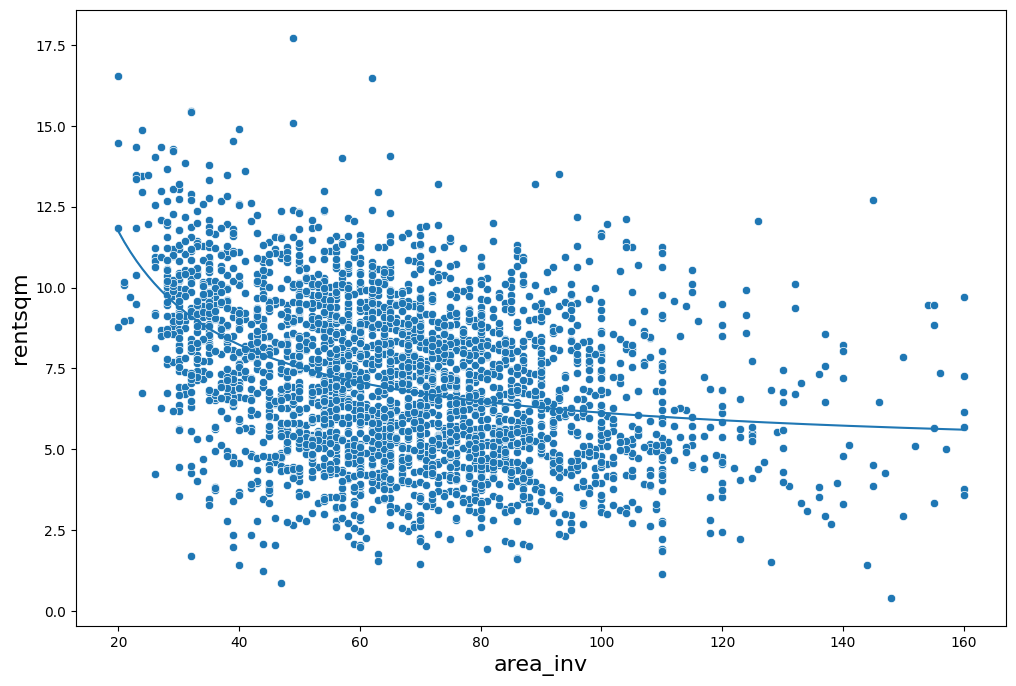

In [39]:
y = df["rentsqm"]
X = df["area_inv"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

plt.figure(figsize=(12, 8))
plt.xlabel("area_inv",size=16)
plt.ylabel("rentsqm",size=16)
#Plot the data
sns.scatterplot(x = df["area"], y = y)
#Plot the regression line
sns.lineplot(x = df["area"], y = results.fittedvalues)

plt.show()

<AxesSubplot: xlabel='area'>

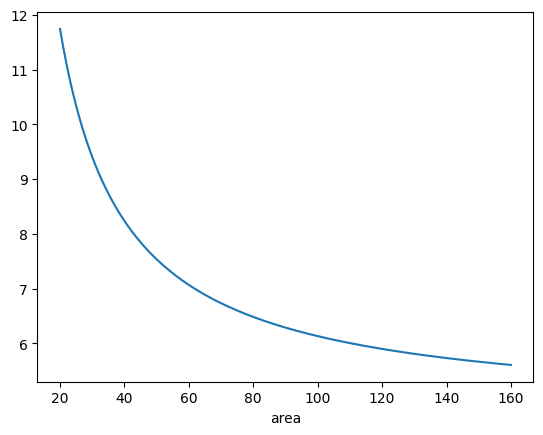

In [32]:
sns.lineplot(x = df["area"], y = results.fittedvalues)
